[]

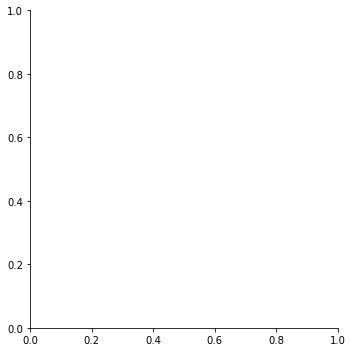

In [1]:
import random 

class academia:
    def __init__(self):
        self.halteres = [i for i in range(10, 36) if i % 2 == 0]
        self.porta_halteres = {}
        self.reiniciar_dia() 
    
    def reiniciar_dia(self):
        self.porta_halteres = {i : i  for i in self.halteres}
        
    def lista_halteres(self):
        return [i for i in self.porta_halteres.values() if i != 0]
    
    def lista_espacos(self):
        return [i for i, j in self.porta_halteres.items() if j == 0]
    
    def pegar_halteres(self, peso):
        halteres_position = list(self.porta_halteres.values()).index(peso)
        key_halteres = list(self.porta_halteres.keys())[halteres_position]
        self.porta_halteres[key_halteres] = 0
        return peso
    
    def devolver_halteres(self, position, peso):
        self.porta_halteres[position] = peso
        
    def calcular_caos(self):
        num_caos = [i for i, j in self.porta_halteres.items() if i != j]
        return len(num_caos) / len(self.porta_halteres)
        
class usuario:
    def __init__(self, tipo, academia):
        self.tipo = tipo # tipo 1 é organizado | tipo 2 é bagunceiro
        self.academia = academia
        self.peso = 0
    
    def iniciar_treino(self):
        lista_pesos = self.academia.lista_halteres()
        self.peso = random.choice(lista_pesos)
        self.academia.pegar_halteres(self.peso)
    
    def finalizar_treino(self):
        espacos = self.academia.lista_espacos()
        
        if self.tipo == 1:
            if self.peso in espacos:
                self.academia.devolver_halteres(self.peso, self.peso)
                
            else:
                position = random.choice(espacos)
                self.academia.devolver_halteres(position, self.peso)
                
        if self.tipo == 2:
                position = random.choice(espacos)
                self.academia.devolver_halteres(position, self.peso)
        
        self.peso = 0
        

academia = academia()

usuarios = [usuario(1, academia) for i in range(10)]
usuarios += [usuario(2, academia) for i in range(1)]

random.shuffle(usuarios)

list_chaos = []

for k in range(50):
    academia.reiniciar_dia()
    for i in range(10):
        random.shuffle(usuarios)

        for user in usuarios:
            user.iniciar_treino()

        for user in usuarios:
            user.finalizar_treino()

    list_chaos += [academia.calcular_caos()]
            
import seaborn as sns
sns.displot(list_chaos)
            
list_chaos
